# Analysis of the historical curves

In [1]:
import os
os.chdir("..")

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from helpers import utils

Import data and clean

In [6]:
histCurves = utils.import_data("data/ESTR_historical.xlsx", sheet="rates")
histCurves.dropna(inplace=True)
histCurves = histCurves.astype(np.float)
histCurves *= 0.01
maturities = np.array([    
    7/360, 30/360, 90/360, 180/360, 1, 3, 5, 10, 15, 20, 30, 50
])
str_maturities = list(map(lambda x: str(x)+" yrs", list(np.around(maturities,4))))
histCurves.columns = str_maturities

Plot 3D term structure

In [1]:
import matplotlib.dates as dates
import matplotlib.ticker as ticker

rw, cl = histCurves.shape
x = np.repeat(histCurves.index.values, cl).reshape(rw, cl)
x = dates.date2num(x)
y = np.tile(maturities, rw).reshape(rw, cl)
z = histCurves.values

fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection="3d")
ax.plot_surface(x, y, z, rstride=10, cstride=1, cmap="Oranges", vmin=np.nanmin(z), vmax=np.nanmax(z))
ax.set_title("Historical Yield Curve Term Structure")
ax.set_ylabel("Maturity")
ax.set_zlabel("Yield")
fmt_date = lambda xx, pos=None: dates.num2date(xx).strftime("%Y-%m-%d")
ax.w_xaxis.set_major_formatter(ticker.FuncFormatter(fmt_date))
for tl in ax.w_xaxis.get_ticklabels():
    tl.set_ha("right")
    tl.set_rotation(15)
plt.savefig("plots/historicalYTM.png")
plt.show()

NameError: name 'histCurves' is not defined

Explore PCA

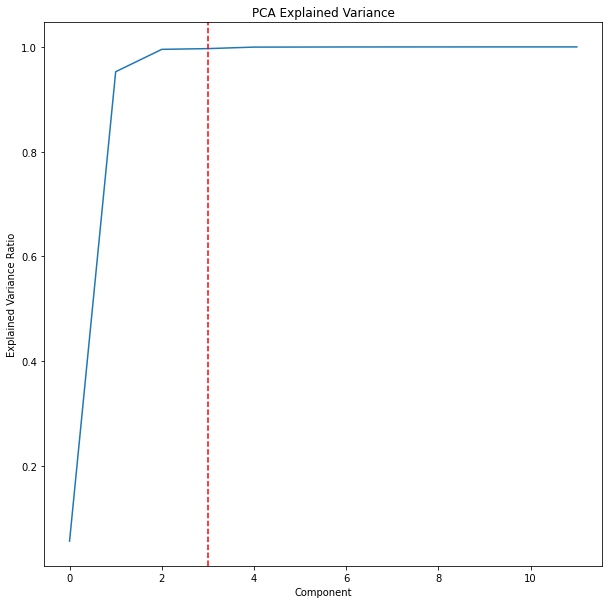

In [63]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

histCurves_scaled = StandardScaler().fit_transform(histCurves)
expVar = PCA().fit(histCurves_scaled).explained_variance_ratio_

fig, ax = plt.subplots(figsize=(10, 10))
plt.plot(1-expVar)
plt.xlabel("Component")
plt.ylabel("Explained Variance Ratio")
plt.title("PCA Explained Variance")
plt.axvline(3, ls="--", color="red")
plt.savefig("plots/pca-explainedVariance-ytmCurve.png")
plt.show()

Plot some of the discount curves

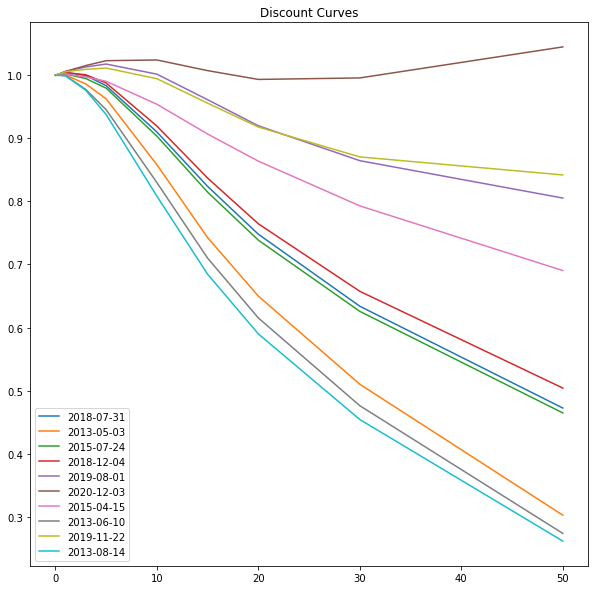

In [62]:
sample = np.exp(-histCurves.sample(10) * maturities)
fig, ax = plt.subplots(figsize=(10, 10))
for idx, row in sample.iterrows():
    plt.plot(maturities, row, label=idx)
plt.legend()
plt.title("Discount Curves")
plt.show()